In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (80,20)
import os
from os import listdir
from os.path import isfile, join
import numpy as np
from bfseg.utils.image_enhancement import *

from os import listdir
import os
from os.path import isfile, join


In [3]:
## Main Program

cam = "cam0"

working_dir = "/home/rene/cla_dataset/"+cam+"/"
output_dir = "/home/rene/cla_dataset/sp_slac"

# Copy all images int this list
image_folders = [f for f in listdir(working_dir)  if ".txt" not in f]

# Sort by timestamp as they will be remapped to img_001, img_002,...
image_folders = sorted(image_folders, key=float, reverse = False)

# Projected pointcloud 
files_labels = [ f + "/labels.png" for f in image_folders]
# Projected pointcloud on top of original image
files_preview = [ f + "/preview.png" for f in image_folders]
# Distance from camera for each projected pointcloud. 
files_distance = [f + "/distance.png" for f in image_folders]
# original input image
files_original = [f + "/original.png" for f in image_folders]


In [67]:
# Extracts mapping from previous image name (timestamp) to new image name (number)
timestamp_number_mapping = ""
for j,k in enumerate(image_folders):
    timestamp_number_mapping += str(j).zfill(4)+ "," + str(k) +";\n"
    
try:
    os.mkdir(output_dir)
except OSError:
    pass
    
f = open("/home/rene/cla_dataset/sp_slac/"+cam+"_info.txt", "w")
f.write(timestamp_number_mapping)
f.close()

# Convert labels

cnt = 1;
for i in range(len(files_labels)):
    file = files_labels[i]
    print("[", cnt , "/",len(files_labels),"]  -   " ,file, end="\r")
    cnt += 1
    try:
        os.mkdir(output_dir+"/"+ cam + "_img_"+str(i).zfill(4))
    except OSError:
        pass
    # Convert labels
    name = file.replace("/labels.png", "")
    sp = Image.open("/home/rene/lib/scalp/res/"+cam+"/"+name+"_sp.png")
    convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/"+cam+"_img_"+str(i).zfill(4)+"/", resize=True, foregroundTrustRegion=True, useSuperpixel = True,  fg_bg_threshold=70, superpixels=sp, onlyPlotResults = False)

/home/rene/tf_venv/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in true_divide
/home/rene/tf_venv/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


## Plot some results

/home/rene/catkin_ws/src/background_foreground_segmentation/src/bfseg/utils/image_enhancement.py:72: RuntimeWarning: invalid value encountered in true_divide
  mean = distSum / distCounter
/home/rene/catkin_ws/src/background_foreground_segmentation/src/bfseg/utils/image_enhancement.py:73: RuntimeWarning: invalid value encountered in true_divide
  stdDev = (distSquared / distCounter) - (mean * mean)
/home/rene/catkin_ws/src/background_foreground_segmentation/src/bfseg/utils/image_enhancement.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 3, 3 + plt_cnt)


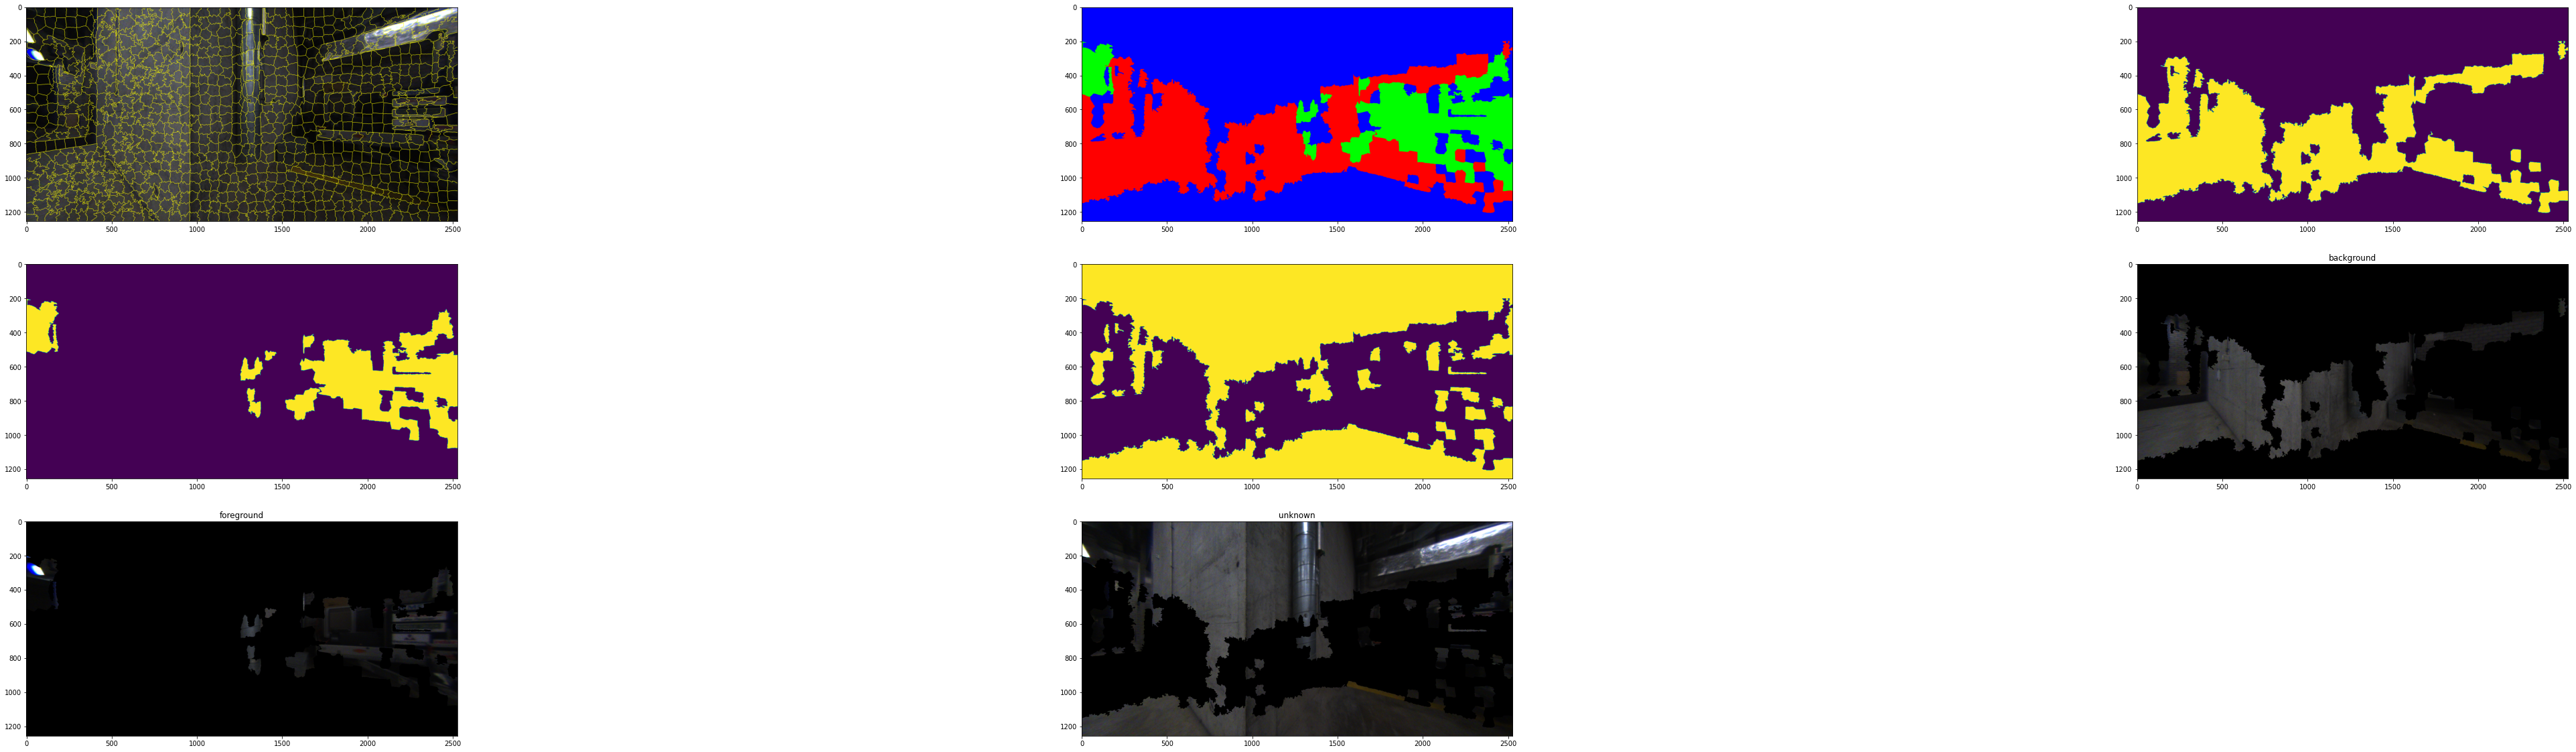

In [8]:
i = 300
file = files_labels[i]
name = file.replace("/labels.png", "")
sp = np.asarray(Image.open("/home/rene/lib/scalp/res/"+cam+"/"+name+"_sp.png")).copy()
convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/img_"+str(i).zfill(4)+"/", resize=False, foregroundTrustRegion=True, useSuperpixel = True,  fg_bg_threshold=50, superpixels=sp, onlyPlotResults = True)

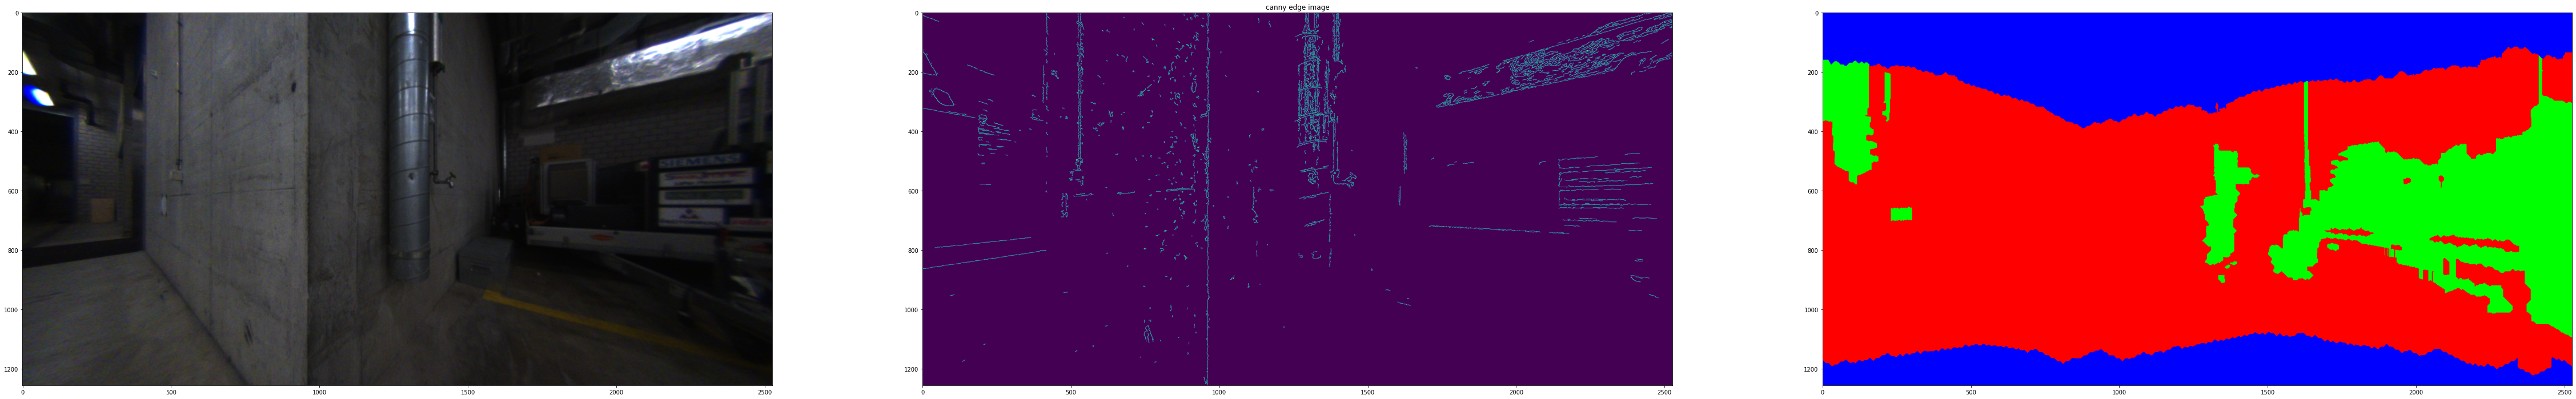

In [9]:
i = 300
file = files_labels[i]
convert_file_path_to_gt(working_dir + files_labels[i], working_dir+files_original[i], working_dir + files_distance[i], output_dir+"/img_"+str(i).zfill(4)+"/", resize=False, foregroundTrustRegion=True, useSuperpixel = False,  fg_bg_threshold=50, onlyPlotResults = True)

# Code to generate fused labels frame watershed and superpixel

In [ ]:
import os
from os import listdir
from os.path import isfile, join
from PIL import Image
import numpy as np

watershed = "/home/rene/cla_dataset/watershed"
fused = "/home/rene/cla_dataset/fused"


i_watershed = sorted([watershed +"/" + f for f in os.listdir(watershed) if os.path.isdir(watershed + "/" + f)])
i_fused = sorted([fused + "/" + f for f in os.listdir(fused) if os.path.isdir(fused + "/" + f)])
for pos in range(len(i_fused)):
    print("image", pos)
    img_w = i_watershed[pos] + "/" + i_watershed[pos].split("/")[-1]+"_semseg.png"
    img_sp = i_fused[pos] + "/" + i_fused[pos].split("/")[-1]+"_semseg.png"
    #print(img_sp)
    #orig = np.asarray(Image.open(i_fused[pos] + "/" + i_fused[pos].split("/")[-1]+"_img.png"))
    np_w = np.asarray(Image.open(img_w))
    np_sp = np.asarray(Image.open(img_sp))
    new_label = np_w.copy()
    new_label[np_w != np_sp] =  1
    
    Image.fromarray(np.uint8(new_label), 'L').save(img_sp)
